In [1]:
# load library 
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
config_file = 'C://Users//vamsi//Downloads//ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C://Users//vamsi//Downloads//frozen_inference_graph.pb'

In [3]:
model=cv.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels=[]
file_name='C://Users//vamsi//Downloads//labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split("\n")

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
# define the config of for these object detection, its already predefine for mobile net you need to just write
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)#255/1=127.5
model.setInputMean((127.5, 127.5,127.5))#mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000024EA24A7EF0>

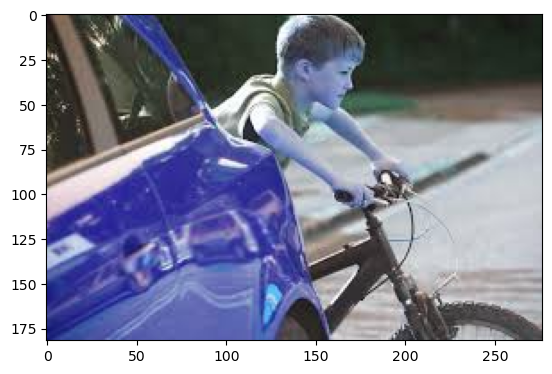

In [8]:
# read the image
img= cv.imread('boy.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.5)

In [10]:
print(ClassIndex)

[1 2]


In [11]:
font_scale=3
font=cv.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv.rectangle(img,boxes,(255,0,0),2)
    cv.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

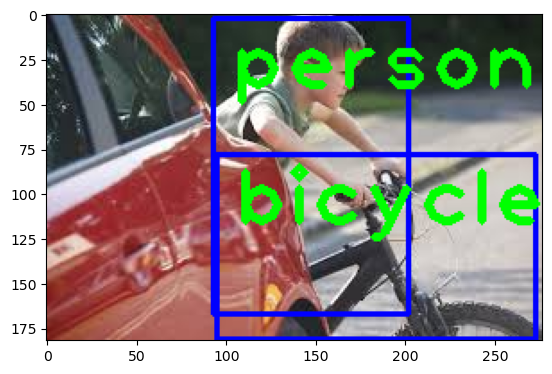

In [12]:
# lets show now 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [13]:
import cv2 as cv
cap = cv.VideoCapture(0)

if not cap.isOpened() :
    cap=cv.VideoCapture(1)
if not cap.isOpened() :
    raise IOError('Cant open the video')
    
font_scale=3
font=cv.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv.rectangle(img,boxes,(255,0,0),2)
                cv.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    
    #cv.imshow('ObjDetection by Phanindra',frame)
    cv.imshow('obj',frame)
    
    if cv.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
# Close all windows
cv.destroyAllWindows()

[1]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()


In [ ]:
import cv2 as cv
cap = cv.VideoCapture('video.mp4')

if not cap.isOpened() :
    cap=cv.VideoCapture(1)
if not cap.isOpened() :
    raise IOError('Cant open the video')
    
font_scale=3
font=cv.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv.rectangle(img,boxes,(255,0,0),2)
                cv.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    
    #cv.imshow('ObjDetection by Phanindra',frame)
    cv.imshow('obj',frame)
    
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
        
cap.release()
# Close all windows
cv.destroyAllWindows()